Author: Amparo Godoy Pastore <br>
Date: May 31st, 2024 <br>
Course: Data Mining and Machine Learning <br>

# Exploratory Data Analysis and Statistical Computations on Telescope Dataset

Use `telescope_data.csv` for this assignment. The dataset has 10 real attributes, and the last one is simply the class label, which is categorical, and which you will ignore for this assignment. Assume that attributes are numbered starting from 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm

# Preliminaries
df = pd.read_csv("telescope_data.csv")
df = df.drop(["class"], axis=1)
df = df.dropna()
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [2]:
# Compute the multivariate mean vector.
mean_vector = df.mean()
display(mean_vector)

fLength      57.675030
fWidth       24.015214
fSize         2.873639
fConc         0.363390
fConc1        0.207434
fAsym        -3.221765
fM3Long      13.136590
fM3Trans      1.791702
fAlpha       31.526518
fDist       197.804527
dtype: float64

In [3]:
# Compute the sample covariance matrix as inner products between the columns of the centered data matrix

centered_df = df - mean_vector

n = len(centered_df) - 1
cov_matrix_inner = (1/n) * (centered_df.T @ centered_df)
cov_matrix_inner


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1766.710603,731.278208,13.877761,-4.795976,-2.754310,-338.521963,-317.091670,134.197204,-42.699515,1088.506735
fWidth,731.278208,511.310810,7.031488,-2.230835,-1.292486,254.802711,-419.194118,76.420843,34.672026,456.444068
fSize,13.877761,7.031488,0.226271,-0.067494,-0.038788,0.460739,1.608942,0.648693,-2.846388,17.400684
fConc,-4.795976,-2.230835,-0.067494,0.029483,0.017875,0.329190,-0.884361,-0.393915,1.319799,-4.615745
fConc1,-2.754310,-1.292486,-0.038788,0.017875,0.011461,0.154446,-0.605827,-0.209961,0.710753,-2.523787
fAsym,-338.521963,254.802711,0.460739,0.329190,0.154446,3899.838668,-263.597250,15.496390,10.170821,-659.973549
fM3Long,-317.091670,-419.194118,1.608942,-0.884361,-0.605827,-263.597250,2851.490243,124.168867,-277.106455,633.900249
fM3Trans,134.197204,76.420843,0.648693,-0.393915,-0.209961,15.496390,124.168867,463.939383,-33.519699,165.463602
fAlpha,-42.699515,34.672026,-2.846388,1.319799,0.710753,10.170821,-277.106455,-33.519699,825.699936,-479.369739
fDist,1088.506735,456.444068,17.400684,-4.615745,-2.523787,-659.973549,633.900249,165.463602,-479.369739,6361.467591


In [4]:
# Compute the sample covariance matrix as outer product between the centered data points.
covariance_matrix_outer = np.zeros((centered_df.shape[1], centered_df.shape[1]))

#sum of outer products
for i in range(len(centered_df)):
    xi = centered_df.iloc[i].values.reshape(-1, 1)
    covariance_matrix_outer += xi @ xi.T

covariance_matrix_outer = (1 / n) * covariance_matrix_outer

pd.DataFrame(covariance_matrix_outer, index=df.columns, columns=df.columns)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1766.710603,731.278208,13.877761,-4.795976,-2.754310,-338.521963,-317.091670,134.197204,-42.699515,1088.506735
fWidth,731.278208,511.310810,7.031488,-2.230835,-1.292486,254.802711,-419.194118,76.420843,34.672026,456.444068
fSize,13.877761,7.031488,0.226271,-0.067494,-0.038788,0.460739,1.608942,0.648693,-2.846388,17.400684
fConc,-4.795976,-2.230835,-0.067494,0.029483,0.017875,0.329190,-0.884361,-0.393915,1.319799,-4.615745
fConc1,-2.754310,-1.292486,-0.038788,0.017875,0.011461,0.154446,-0.605827,-0.209961,0.710753,-2.523787
fAsym,-338.521963,254.802711,0.460739,0.329190,0.154446,3899.838668,-263.597250,15.496390,10.170821,-659.973549
fM3Long,-317.091670,-419.194118,1.608942,-0.884361,-0.605827,-263.597250,2851.490243,124.168867,-277.106455,633.900249
fM3Trans,134.197204,76.420843,0.648693,-0.393915,-0.209961,15.496390,124.168867,463.939383,-33.519699,165.463602
fAlpha,-42.699515,34.672026,-2.846388,1.319799,0.710753,10.170821,-277.106455,-33.519699,825.699936,-479.369739
fDist,1088.506735,456.444068,17.400684,-4.615745,-2.523787,-659.973549,633.900249,165.463602,-479.369739,6361.467591


The cosine of the angle between the two centered vectors is: 0.7694093096665069


Text(0, 0.5, 'fWidth')

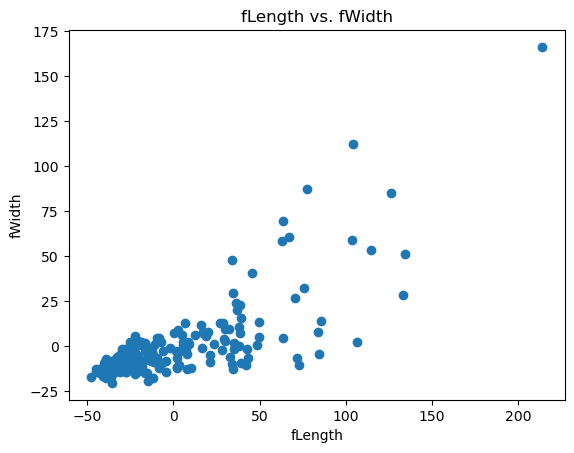

In [5]:
# Compute the correlation between Attributes 1 and 2 by computing the cosine of the angle between the centered attribute vectors. Plot the scatter plot between these two attributes.
x1 = centered_df.iloc[:, 0]
x2 = centered_df.iloc[:, 1]

n = len(x1) - 1

cos = (x1.T @ x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

print(f"The cosine of the angle between the two centered vectors is: {cos}")
plt.scatter(x1, x2)
plt.title(f"{x1.name} vs. {x2.name}")
plt.xlabel(f"{x1.name}")
plt.ylabel(f"{x2.name}")

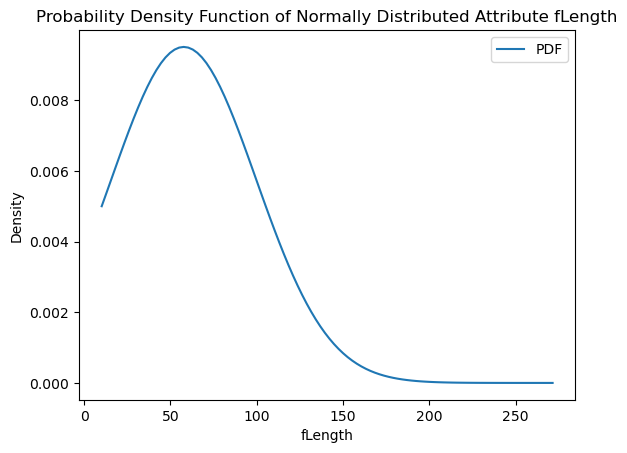

In [6]:
# Assuming that Attribute 1 is normally distributed, plot its probability density function.
att = df.iloc[:, 0]
values = np.linspace(min(att), max(att), 100)
mean_att = mean_vector.iloc[0]
var_att = np.var(att)
std_att = np.sqrt(var_att)
pdf = norm.pdf(values, mean_att, std_att)

plt.plot(values, pdf, label='PDF')
plt.title(f'Probability Density Function of Normally Distributed Attribute {df.iloc[:,0].name}')
plt.xlabel(f'{df.iloc[:,0].name}')
plt.ylabel('Density')
plt.legend()
plt.show()

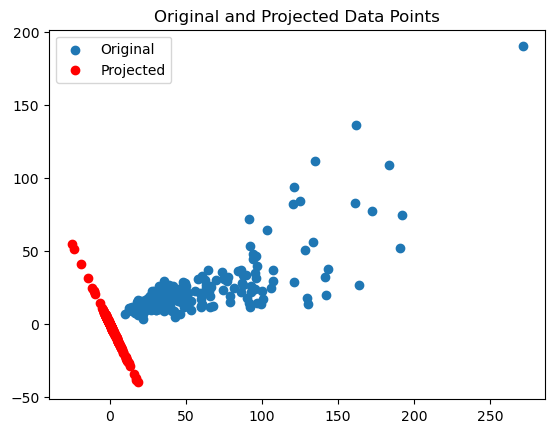

In [7]:
# Project two Attributes 1, and 2 to the line [1.6, -3.5] and plot the projected data.

line = np.array([1.6, -3.5])
attributes = df.iloc[:,0:2]

unit_line = line/np.linalg.norm(line, 2) #create unit vector for the line
proj = np.dot(attributes, unit_line)[:, np.newaxis] * unit_line #project


# plot
plt.scatter(attributes.iloc[:,0:1], attributes.iloc[:,1:2])
plt.scatter(proj[:,0], proj[:,1], color='red')
plt.legend(['Original', 'Projected'])
plt.title('Original and Projected Data Points')
plt.show()


In [12]:
# Which attribute has the largest variance, and which attribute has the smallest variance? Print these values.
var_vector = np.var(df, axis=0)

largest_var_att = var_vector.idxmax()
smallest_var_att = var_vector.idxmin()

print(f"Largest Variance: {var_vector[largest_var_att]} in attribute {largest_var_att}")
print(f"Smallest Variance: {var_vector[smallest_var_att]} in attribute {smallest_var_att}")

Largest Variance: 6329.8184983341225 in attribute fDist
Smallest Variance: 0.011404273398678248 in attribute fConc1


fLength     1757.920998
fWidth       508.766975
fSize          0.225145
fConc          0.029336
fConc1         0.011404
fAsym       3880.436485
fM3Long     2837.303724
fM3Trans     461.631227
fAlpha       821.591976
fDist       6329.818498
dtype: float64

In [17]:
# Which pair of attributes has the largest covariance, and which pair of attributes has the smallest covariance? Print these values.
cov_values = cov_matrix_inner.values
np.fill_diagonal(cov_values, np.nan)
largest_cov = np.nanmax(cov_values)
smallest_cov = np.nanmin(np.abs(cov_values))

largest_pair_indices = np.unravel_index(np.nanargmax(cov_values), cov_values.shape)
smallest_pair_indices = np.unravel_index(np.nanargmin(np.abs(cov_values)), cov_values.shape)
attribute_names = df.columns

largest_pair_names = (attribute_names[largest_pair_indices[0]], attribute_names[largest_pair_indices[1]])
smallest_pair_names = (attribute_names[smallest_pair_indices[0]], attribute_names[smallest_pair_indices[1]])

print(f"Largest Covariance: {largest_cov} between {largest_pair_names}")
print(f"Smallest Covariance: {smallest_cov} between {smallest_pair_names}")

Largest Covariance: 1088.506735404915 between ('fLength', 'fDist')
Smallest Covariance: 0.017874797343283583 between ('fConc', 'fConc1')


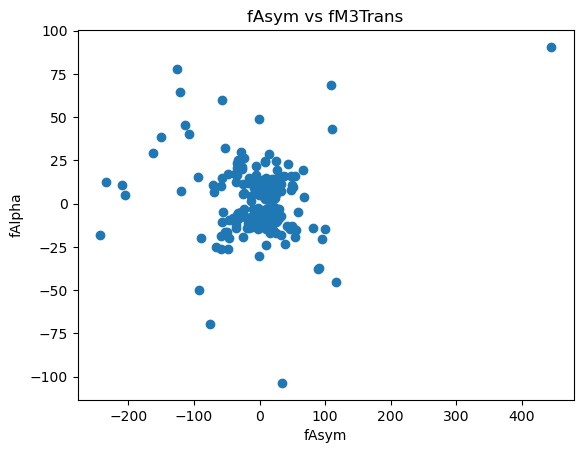

In [10]:
# Plot attribute 6 vs attribute 8. Mark each point as a circle.

plt.scatter(df.iloc[:,5], df.iloc[:,7])
plt.title(f"{df.iloc[:,5].name} vs {df.iloc[:,7].name}")
plt.xlabel(f"{df.iloc[:,5].name}")
plt.ylabel(f"{df.iloc[:,8].name}")
plt.show()

In [11]:
# Write two paragraphs describing all the points mentioned above.

In this analysis of the telescope dataset, we focused on exploring the statistical properties of the ten attributes. Initially, we cleaned the dataset by removing any rows with missing values and the class label. The multivariate mean vector provided us insight into the central tendency of each attribute. Among these, fDist had the highest mean value of approximately 197.80, while fConc1 had the lowest mean value of around 0.207. The sample covariance matrix was computed using both inner product and outer product methods, with both approaches yielding the same results. This matrix highlighted how attributes varied together, with fDist and fLength showing the largest positive covariance (1088.51), indicating a strong positive linear relationship. Conversely,fConc and fConc1 had the smallest covariance 0.01787, suggesting  between these two attributes.

Further analysis revealed that fDist had the largest variance (6329.82), which suggests significant dispersion in its values, while fConc1 had the smallest variance (0.011), indicating minimal variation. The cosine similarity between the centered vectors of fLength and fWidth was found to be 0.769, implying a relatively strong correlation between these two attributes. A scatter plot confirmed this relationship visually. Moreover, we projected fLength and fWidth onto a line with direction [1.6, -3.5], demonstrating how these attributes align along this vector. Lastly, a scatter plot between fAsym and fM3Trans highlighted their weak relationship, with each data point marked as a circle. 